In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False #显示中文和正负号
%config InlineBackend.figure_format='svg' #增加清晰度
from pandas import DataFrame
#设定绘图风格
plt.style.use('ggplot')

In [2]:
%matplotlib inline

#user_id：用户ID
#order_dt：购买日期
#order_products：购买产品数
#order_amount：购买金额

In [3]:
#因为原数据header是数据要改成header=none,然后对间隔进行编辑更容易看
columns = ['user_id','order_dt', 'order_products', 'order_amount']
df=pd.read_csv(r'D:\notebook\data20200206\CDNOW_master.txt',header=None,names=columns,sep='\s+')
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
#数据的预处理，先看看是否有缺失值，然后再看看时间的格式，发现是int整形，把int改成datetime时间格式
df.order_dt = pd.to_datetime(df['order_dt'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [6]:
df.describe()

,user_id,order_products,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


#1增加月份，用来数据分析

### ***由于astype只能对np。array有效，所以要将Series  df['order_dt']用values转换成ndarray的格式才可以用***

In [7]:
df['order_dt'].values.astype('datetime64[M]')

array(['1997-01', '1997-01', '1997-01', ..., '1997-03', '1997-03',
       '1997-03'], dtype='datetime64[M]')

In [8]:
df['month']=df.order_dt.values.astype('datetime64[M]')
df.head()

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


#### 2用户每个月花费的总金额，画出数据分析表
#所有用户每月购买数量
#所有用户每月消费次数
#统计每月的消费人数

In [9]:
#用户每个月花费的总金额
df.groupby(by='month').aggregate({"order_amount":'sum'})

,order_amount
month,
1997-01-01,299060.17
1997-02-01,379590.03
1997-03-01,393155.27
1997-04-01,142824.49
1997-05-01,107933.30
1997-06-01,108395.87
1997-07-01,122078.88
1997-08-01,88367.69
1997-09-01,81948.80


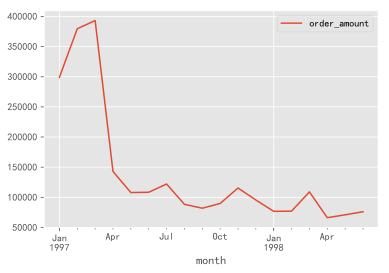

In [10]:
df.groupby(by='month').aggregate({"order_amount":'sum'}).plot()
#可以对该series直接求plot.plt.grid(b='True')


In [11]:
#所有用户每月购买数量
df.groupby(by='month').aggregate({"order_products":'sum'})

,order_products
month,
1997-01-01,19416
1997-02-01,24921
1997-03-01,26159
1997-04-01,9729
1997-05-01,7275
1997-06-01,7301
1997-07-01,8131
1997-08-01,5851
1997-09-01,5729


In [12]:
#所有用户每月消费次数
df.groupby(by='month').aggregate({"user_id":'count'})

,user_id
month,
1997-01-01,8928
1997-02-01,11272
1997-03-01,11598
1997-04-01,3781
1997-05-01,2895
1997-06-01,3054
1997-07-01,2942
1997-08-01,2320
1997-09-01,2296


In [13]:
#统计每月的消费人数
df.groupby(by='month')['user_id'].nunique() #求出去重后的数据

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

In [14]:
#统计每月的消费人数另外的算法
df.groupby(by='month')['user_id'].apply(lambda x :len(x.drop_duplicates()))
#这里lambda的函数中的x代表的就是 指user_id 对它去重取长度就是取数量。提供另外一个思路

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

###第三部分，用户个体消费数据分析.
  * 用户消费总购买金额和总数量的统计描述
  * 用户消费次数和用户消费金额的散点图
  * 各个用户消费金额的直方图（消费金额1000以内的分布）
  * 各个用户消费次数的直方图（消费次数在100次以下的分布）

In [15]:
df.groupby(by='user_id').sum()

,order_products,order_amount
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61
6,1,20.99
7,18,264.67
8,18,197.66
9,6,95.85


In [16]:
#用户消费总购买金额和总数量的统计描述
df.groupby(by='user_id').sum()
df.groupby(by='user_id').sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


In [17]:
#用户消费次数和用户消费金额的散点图
df_scatter=df.groupby(by='user_id').agg({'order_products':'count','order_amount':'sum'})
df_scatter.head()

,order_products,order_amount
user_id,,
1,1,11.77
2,2,89.00
3,6,156.46
4,4,100.50
5,11,385.61


In [18]:
plt.scatter(df_scatter['order_products'],df_scatter['order_amount'])
plt.xlabel('order_products')
plt.ylabel('order_amount')

Text(0, 0.5, 'order_amount')

In [19]:
#各个用户消费金额的直方图（消费金额1000以内的分布）可以发现query对单独的series其实不能用，只能用df模式
df_hist1=df.groupby(by='user_id').sum().query('order_amount<1000')['order_amount']
df_hist1

user_id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
6         20.99
7        264.67
8        197.66
9         95.85
10        39.31
11        58.55
12        57.06
13        72.94
14        29.92
15        52.87
16        79.87
17        73.22
18        14.96
19       175.12
20       653.01
21        75.11
22        14.37
23        24.74
24        57.77
25       137.53
26       102.69
27       135.87
28        90.99
29       435.81
30        28.34
          ...  
23541     57.34
23542     77.43
23543     50.76
23544    134.63
23545     24.99
23546     13.97
23547     23.54
23548     23.54
23549     27.13
23550     25.28
23551    264.63
23552     49.38
23553     98.58
23554     36.37
23555    189.18
23556    203.00
23557     14.37
23558    145.60
23559    111.65
23560     18.36
23561     83.46
23562     29.33
23563     58.75
23564     70.01
23565     11.77
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: order_amou

(array([12820.,  4508.,  2046.,  1188.,   747.,   513.,   374.,   290.,
          211.,   139.,    97.,    98.,    69.,    71.,    42.,    47.,
           33.,    29.,    27.,    21.]),
 array([  0.    ,  49.9845,  99.969 , 149.9535, 199.938 , 249.9225,
        299.907 , 349.8915, 399.876 , 449.8605, 499.845 , 549.8295,
        599.814 , 649.7985, 699.783 , 749.7675, 799.752 , 849.7365,
        899.721 , 949.7055, 999.69  ]),
 <a list of 20 Patch objects>)

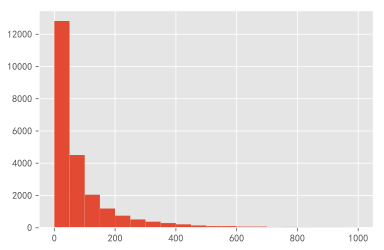

In [20]:
plt.hist(df_hist1,bins=20)
#说明低金额购买用户数量最多，高金额消费的用户数量少

In [21]:
#各个用户消费次数的直方图（消费次数在100次以下的分布）
df_hist2=df.groupby(by='user_id').agg({'order_amount':'sum','order_products':'count'}).query('order_amount<100')['order_products']


(array([1.1576e+04, 0.0000e+00, 3.4350e+03, 0.0000e+00, 0.0000e+00,
        1.4210e+03, 0.0000e+00, 5.7600e+02, 0.0000e+00, 0.0000e+00,
        2.3200e+02, 0.0000e+00, 7.1000e+01, 0.0000e+00, 0.0000e+00,
        1.9000e+01, 0.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <a list of 20 Patch objects>)

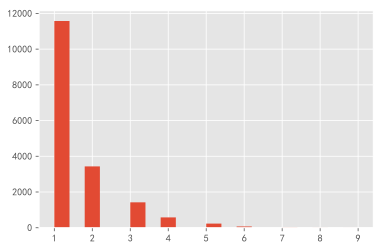

In [22]:
plt.hist(df_hist2,bins=20)

In [23]:
#看消费次数大于100的用户数量
df_count=(df['user_id'].value_counts())>100#用groupby的方法复杂一下但是也是同样的结果\
df_count.value_counts() #对布尔值进行计算，可以得出大于100的有八个小于一百的

False    23562
True         8
Name: user_id, dtype: int64

In [24]:
df.groupby('user_id')['user_id'].count().sort_values(ascending=False)

user_id
14048    217
7592     201
7983     149
22061    143
3049     117
499      110
19597    109
7145     102
2484      80
10079     67
4459      65
7931      62
710       61
12367     60
17104     58
19339     56
6057      55
1722      52
8035      52
13167     50
1077      49
20917     49
20873     49
22013     48
12476     47
1760      47
15562     46
398       44
12860     42
9908      42
        ... 
17161      1
17164      1
8795       1
17165      1
17166      1
8819       1
8820       1
8821       1
8834       1
17123      1
8843       1
8842       1
8841       1
17127      1
8839       1
8838       1
8837       1
8836       1
17130      1
17140      1
17131      1
17133      1
17135      1
17136      1
17137      1
8826       1
17138      1
17139      1
8823       1
1          1
Name: user_id, Length: 23570, dtype: int64

##用户消费行为分析
  * 用户第一次消费的月份分布，和人数统计（绘制线形图）
  * 用户最后一次消费的月份分布，和人数统计（绘制线形图）
  * 新老客户占比（消费一次为新用户，消费多次为老用户）
     * 分析每一个用户的第一次消费何最后一次消费的时间
       * 对分组后的结果进行聚合
     * 分析新老用户的消费比例
  * 用户分层
     * 分析得出每个用户的购买总量和消费金额，和最近一次消费时间的表格rmf
     *rfm模型设计
       * R表示最近一次交易时间的间隔（np。timedelta64（1，‘d’）去去除day字符串）
       * F表示客户的购买商品的总数量 越大越频繁
       * M表示客户交易金额，越大客户价值越高，越小价值越低
       将R，F，M作用在rfm表中
   * 根据价值分层对
     * 重要价值客户
     * 重要保持客户
     * 重要挽留客户
     * 重要发展客户
     * 一般价值客户
     * 一般保持客户
     * 一般挽留客户
     * 一般发展客户
    

##用户消费行为分析
  * 用户第一次消费的月份分布，和人数统计（绘制线形图）
  * 用户最后一次消费的月份分布，和人数统计（绘制线形图）
  
        

In [25]:
#用户第一次消费的月份分布，和人数统计（绘制线形图）
df.groupby(by=['user_id'])['month'].min()#用户第一次消费的月份分布
(df.groupby(by=['user_id'])['month'].min()).value_counts()#用户每个月第一次消费人数的统计

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

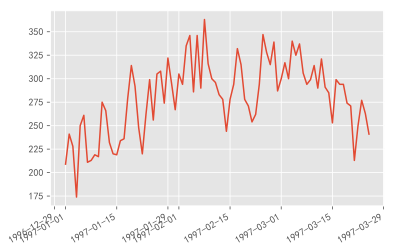

In [26]:
df.groupby(by=['user_id']).min().order_dt.value_counts().plot()

In [27]:
#用户最后一次消费的月份分布，和人数统计（绘制线形图）
df.groupby(by=['user_id'])['month'].max()#用户最后一次消费的月份分布
(df.groupby(by=['user_id'])['month'].max()).value_counts()#用户每个月最后一次消费人数的统计

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

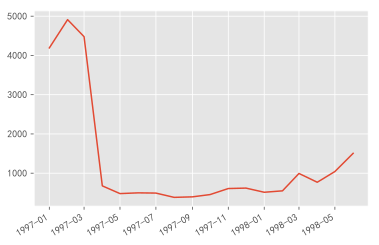

In [28]:
(df.groupby(by=['user_id'])['month'].max()).value_counts().plot()

#新老客户占比（消费一次为新用户，消费多次为老用户）
* 分析每一个用户的第一次消费何最后一次消费的时间
* 对分组后的结果进行聚合
* 分析新老用户的比例

In [29]:
df_dt=df.groupby(by='user_id')['order_dt'].agg(['min','max'])#从第一次消费和最后一次消费的时间间隔计算就可以了

In [30]:
(df_dt['min']==df_dt['max']).value_counts()

True     12054
False    11516
dtype: int64

In [31]:
12054/11516 #得出True 新客户的和老客户的比例是1.04

1.0467176102813478

4#* 用户分层
     * 分析得出每个用户的购买总量和消费金额，和最近一次消费时间的表格rmf
     *rfm模型设计
       * R表示最近一次交易时间的间隔（np。timedelta64（1，‘d’）去去除day字符串）
       * F表示客户的购买商品的总数量 越大越频繁
       * M表示客户交易金额，越大客户价值越高，越小价值越低
       将R，F，M作用在rfm表中
   * 根据价值分层对
     * 重要价值客户
     * 重要保持客户
     * 重要挽留客户
     * 重要发展客户
     * 一般价值客户
     * 一般保持客户
     * 一般挽留客户
     * 一般发展客户
    

In [32]:
# 分析得出每个用户的购买总量和消费金额，和最近一次消费时间的表格rmf
#聚合数据超过两个考虑使用透视表
rfm=df.pivot_table(index='user_id',aggfunc={'order_products':'sum','order_amount':'sum','order_dt':'max'})
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [33]:
#* R表示最近一次交易时间的间隔（np。timedelta64（1，‘d’）去去除day字符串）#等于是除以545 days/days等于消掉days变成浮点数
# 图标里的order_dt是每个人的最后购买天数，因为数据距离我们已经很遥远了，我们就去该数据的最后一个购买天数当做截止日所以对这个数据再求max
rfm['R']=-(rfm['order_dt']-rfm['order_dt'].max())/np.timedelta64(1,'D')#timedelta64表示 1是几天，‘D’是天数，所以用除法来表示

In [34]:
rfm.head()

,order_amount,order_dt,order_products,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [35]:
rfm.rename(columns={'order_amount':'M','order_products':'F'},inplace=True)
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [36]:
rfm[['R','F','M']].apply(lambda x: x-x.mean()).head()#这里默认axis=0就是按列计算均值
#将函数列下面的这个均值引用提上来，意思就是R越大代表距离平均消费间隔越久远，FM小于零说明小于平均消费数量和消费金额
#作者用1,0代表活跃度大于0的为1，小于0的为0来做成 文字表述的数字化
#比如 111 就是说明购买间隔超过平均值，但是购买金额和购买数量是大于平均值的 所以是叫重要价值客户，最好的当然是011购买间隔低于平均值，
#说明是活跃用户，经常买老客户回头客，是重要维持客户

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574


In [37]:
def rfm_func(x):
    #存储是三个字符串形式的0或者1
    level=x.map(lambda x:'1' if x>=0 else '0')
    label=level.R+level.F+level.M
    dic={'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'}
    result=dic[label]
    return result
rfm['label']=rfm[['R','F','M']].apply(lambda x: x-x.mean()).apply(rfm_func,axis=1) #用函数嵌套函数，把文字表达成数据模式。
rfm.head()

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户
2,89.00,1997-01-12,6,534.0,一般挽留客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般发展客户
5,385.61,1998-01-03,29,178.0,重要保持客户


In [38]:
#统计不同层次用户个数
rfm.groupby(by='label').count()

,M,order_dt,F,R
label,,,,
一般价值客户,77,77,77,77
一般保持客户,206,206,206,206
一般发展客户,3300,3300,3300,3300
一般挽留客户,14074,14074,14074,14074
重要价值客户,787,787,787,787
重要保持客户,4554,4554,4554,4554
重要发展客户,331,331,331,331
重要挽留客户,241,241,241,241


5#  将用户划分为活跃用户和其他用户
* 统计每个用户每个月的消费次数
* 统计每个用户每个月是否消费，消费为1，没消费为0
      * 知识点DataFrame 中applymap的区别
* 将用户按一个月分为
   * unreg观望客户，前两个月没有买第三个月才开始买  #因为透视表是上帝视角，很多数据会失真，实际上最开始没有买的客户是因为没有注册
   * unactive非活跃用户 首月购买后后续月份没有购买
   * new新用户  当前月进行首次购买就是新用户
   * active 活跃用户 连续月份有购买的用户
   * return 回头用户 购买之后间隔n个月又过来购买的用户
   


In [39]:
#统计每个用户每个月的消费次数
df_pum=df.pivot_table(index='user_id',values='order_dt',aggfunc='count',columns='month').fillna(0)
df_pum.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#统计每个用户每个月是否消费，消费为1，没消费为0,题目提到对行索引列索引的统统引用，直接用applymap元素填充映射
df_purchase=df_pum.applymap(lambda x: 1 if x>=1 else 0)
df_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [41]:
#用户活跃度分组如上题目要求
def active_status(data):#命名一个函数，这个函数的变量data就是需要提取函数的数据表(df_purchase)里面的每个值
#     print(type(data))
    status=[]#列表用来存储每个用户某一个月的活跃度
    for i in range(18):#18代表18个月份 长度
        #如果本月没有消费
        if data[i]==0:  #data[i]==0有两种情况
            if len(status)>0:  #情况1， 如果status已经填充了用户的活跃度
                if status[i-1]=='unreg':#如果前一个月是未注册，因为data【i】=0没有消费，那么这个月也定义为未注册
                    status.append('unreg')
                else:                   #不是上述情况，在data[i]=0的情况下status将该位置扩充为unactive，不活跃
                    status.append('unactive')
            else: #如果len（status）<=0 的时候说明还没录入值是一行的第一个，这个时候消费为0，那么就可以给status该位置下填充为unreg未注册
                status.append('unreg')
                    #若本月消费有消费这个相对data[i]》0就是说有消费的情况下
        else:
            if len(status)==0: #如果这个列表长度为0也就是第一列，但是已经发生了购买，那么就是new
                status.append('new')
            else: # 就是len》0的情况也就是不是第一个值status已经有了取值的情况下
                if status[i-1]=='unreg': #如果再有消费的情况下，前值是未注册，那么如今消费了肯定就是新人了
                    status.append('new')
                elif status[i-1]=='unactive': #又或者前值是非活跃用户，那么如今又消费了，就填充return，回流客户
                    status.append('return')
                else:                     #如果不是以上的情况，那么这个人就是活跃用户，不是以上情况，肯定就是经常消费的活跃用户。
                    
                    status.append('active')
    return status #返回status的填充序列
purchase_status = df_purchase.apply(active_status, axis=1, raw=True) #axis是1因为前提说了range18也就是按照行传入status数据
purchase_status.tail() 
                    

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23569,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23570,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


#6每个月不同活跃用户的计数

In [42]:
purchase_status.replace('unreg',np.NaN).apply(lambda x: pd.value_counts(x),axis=0) #由于不活跃用户实际上不参与运算，会直接用nan替代。

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


- 可以看出新用户，除了前三个月，以后都没有增加，说明没有新的客户增加，活跃用户持续下降，说明公司业务运营疲弱，不活跃用户长期稳定
转换率低

In [43]:
df_activity=purchase_status.replace('unreg',np.NaN).apply(lambda x: pd.value_counts(x),axis=0)

In [44]:
df_activity.T.fillna(0) #转制

,active,new,return,unactive
month,,,,
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0


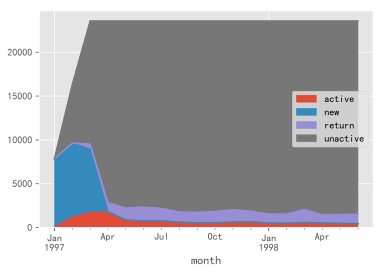

In [45]:
df_activity.T.fillna(0).plot.area() #默认行索引

In [46]:
df_activity.T.fillna(0).apply(lambda x: x/x.sum(),axis=1)

,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


- 可以看出消费用户的构成，active new return 如果return占比增加说明促销很给力，如果新人很多说明市场营销很给力，活跃用户很多
- 说明运维很稳定

### 4 用户的购买周期（按订单）
- 用户消费周期描述
- 用户消费周期分布
### 用户生命周期（按第一次和最后一次消费）
- 用户生命周期描述
- 用户生命周期分布

In [47]:
purchase_period=df.groupby('user_id').apply(lambda x: x.order_dt-x.order_dt.shift())# 数据下移，就是消费的后一天减去前一天就是时间间距
purchase_period.tail()

user_id       
23568    69654   11 days
         69655   17 days
23569    69656       NaT
23570    69657       NaT
         69658    1 days
Name: order_dt, dtype: timedelta64[ns]

In [48]:
purchase_period.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

- 从消费周期统计描述可以看出，用户平均消费周期为68天，中位数为31天，最大值有533天

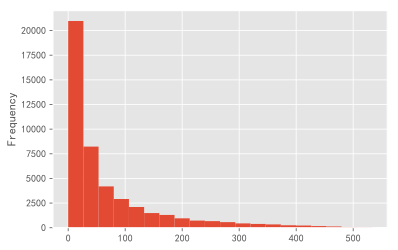

In [49]:
#用户消费周期分布，
#因为时间序列是datetime64格式，需要修改成数字格式引入之前用过的np。timedelta格式去掉日期
(purchase_period/np.timedelta64(1,'D')).plot.hist(bins=20)

- 大多数用户消费周期都在100天内

- 用户生命周期（按第一次和最后一次消费）
- 用户生命周期描述
- 用户生命周期分布

In [50]:
df_dt=df.groupby(by='user_id')['order_dt'].agg(['min','max'])#从第一次消费和最后一次消费的时间间隔计算就可以了
df_dt.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [51]:
df_dt['max']-df_dt['min']

user_id
1         0 days
2         0 days
3       511 days
4       345 days
5       367 days
6         0 days
7       445 days
8       452 days
9       523 days
10        0 days
11      415 days
12        0 days
13        0 days
14        0 days
15        0 days
16      252 days
17        0 days
18        0 days
19      160 days
20       17 days
21       12 days
22        0 days
23        0 days
24      384 days
25      523 days
26       25 days
27        5 days
28       66 days
29      480 days
30       44 days
          ...   
23541     8 days
23542     0 days
23543     0 days
23544   305 days
23545     0 days
23546     0 days
23547    13 days
23548     0 days
23549     0 days
23550     0 days
23551   170 days
23552     9 days
23553     3 days
23554   313 days
23555   442 days
23556   439 days
23557     0 days
23558   337 days
23559    94 days
23560     0 days
23561   430 days
23562     0 days
23563   193 days
23564   250 days
23565     0 days
23566     0 days
23567     0 days
23568 

In [52]:
(df_dt['max']-df_dt['min']).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

- 用户平均生命周期为134天，中位数为0天，最大值是544天

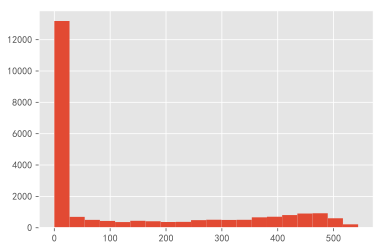

In [53]:
((df_dt['max']-df_dt['min'])/np.timedelta64(1,'D')).hist(bins=20)

- 可以看出用户生命周期为0的频次集中（可以过滤周期为0的人）

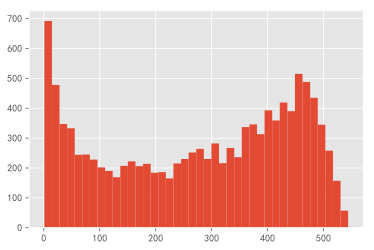

In [54]:
dt_lift=((df_dt['max']-df_dt['min'])/np.timedelta64(1,'D'))
dt_lift[dt_lift>0]
(dt_lift[dt_lift>0]).hist(bins=40)

### 5 复购率和回购率的分析
- 复购率
    - 自然月内购买多次的用户占比
- 回购率
    - 曾经购买的用户在某一时期再次购买的占比

In [55]:
#统计每个用户每个月的消费次数
df_pum=df.pivot_table(index='user_id',values='order_dt',aggfunc='count',columns='month').fillna(0)
df_pum.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_count=df_pum.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0) #空值不参与运算
df_count.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [57]:
df_count.sum()/df_count.count() #如果不将没消费的设为空值，则没消费的也参与count计算

month
1997-01-01    0.107571
1997-02-01    0.122288
1997-03-01    0.155292
1997-04-01    0.223600
1997-05-01    0.196929
1997-06-01    0.195810
1997-07-01    0.215138
1997-08-01    0.200339
1997-09-01    0.202415
1997-10-01    0.206634
1997-11-01    0.202170
1997-12-01    0.219957
1998-01-01    0.210800
1998-02-01    0.203095
1998-03-01    0.229612
1998-04-01    0.199026
1998-05-01    0.200269
1998-06-01    0.214475
dtype: float64

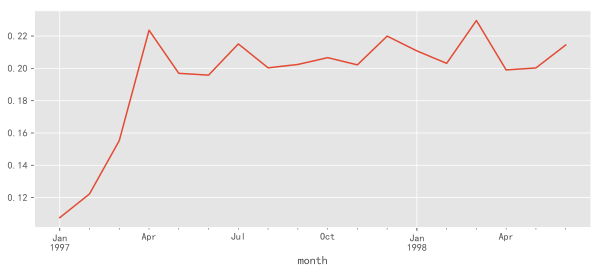

In [58]:
(df_count.sum()/df_count.count()).plot(figsize=(10,4))

- 说明复购率维持在20%左右复购率比较低

In [65]:
#回购率
#曾经购买的用户在某一时期再次购买的占比
df_purchase.head()#空值不参与运算

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [74]:
def back(data):
    status=[]
    for i in range(17): #因为最后一个月没有下个月的对比数据
        if data[i]==1:
            if data[i+1]==1: #如果本月为1，下个月也为1，那本月就填充1 说明是本月有消费下个月有人回购
                status.append(1)
            else:
                status.append(0) #如果本月为1，下个月为0 那本月就填充0，说明本月有消费，但是下个也没有回购
        else:
            status.append(np.NaN) #如果本月为0，那么下个月是无论是否有消费本月都填充nan空值 不参与计算
    status.append(np.NaN)  #第十八列因为没有下一个月的数据只能填充为空值 
    return status
purchase_again = df_purchase.apply(back, axis=1, raw=True)
purchase_again.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


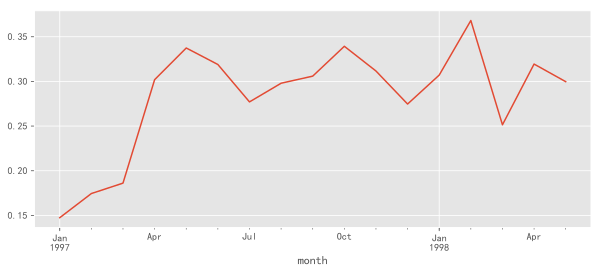

In [78]:
(purchase_again.sum()/purchase_again.count()).plot(figsize=(10,4))